In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data

df = pd.read_csv('/content/recruitment_data.csv')
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [2]:
def extract_features(df, return_X_y=True, as_frame=True):
  X = df.iloc[:, :-1]  # Select all columns except the last one
  y = df.iloc[:, -1]   # Select the last column as the target variable
  if not as_frame:
    X = X.values
    y = y.values
  if not return_X_y:
    return X
  return X, y

X, y = extract_features(df, return_X_y=True, as_frame=True)

In [3]:
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2
...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3
1496,27,1,2,10,3,14.847731,43,97,7,2
1497,24,1,1,1,2,4.289911,31,91,58,1
1498,48,0,2,4,4,36.299263,9,37,44,2


In [4]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

In [5]:
# Let's get a train and test set. We'll use 20% of our database (240 flowers) as a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
382,41,1,3,4,1,26.693326,61,80,55,2
538,47,1,3,3,3,22.600528,73,41,56,2
1493,43,1,2,14,4,25.620088,42,36,55,1
1112,29,0,2,8,3,26.960349,81,53,80,3
324,48,1,2,7,4,14.136047,28,71,40,2
...,...,...,...,...,...,...,...,...,...,...
1130,44,0,2,5,3,42.858098,71,8,44,1
1294,42,1,2,8,1,27.773247,88,52,40,2
860,47,0,2,6,3,34.216968,50,42,55,2
1459,48,0,2,13,1,2.642835,18,44,68,2


In [6]:
# First, we initialize the model.
model = tf.keras.models.Sequential()

In [7]:
# First our input layer. For this layer, and this layer only, we need to specify the size of our input. For our dataset this means the amount of columns in our X.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(X.shape[1],)))
# Now some hidden layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
# Finally, our output layer. Since we have 3 possible classes, we need 3 output neurons.
# For a regression problem, we would have only 1. For an image creation network, we would have as many pixels as the image we wanted to create!
model.add(tf.keras.layers.Dense(3))
# A final layer with several output neurons gives us logits as results. We can do a final pass with a Softmax layer to turn them into percentages.
model.add(tf.keras.layers.Softmax())

In [8]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=optim,metrics=['accuracy'])
history = model.fit(X_train.values, y_train.values,
        validation_data=(X_test.values, y_test.values),
        epochs = 20,
        batch_size=32)

Epoch 1/20
38/38 [==============================] - 1s 10ms/step - loss: 1.6193 - accuracy: 0.6008 - val_loss: 0.7462 - val_accuracy: 0.6333
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.6417 - val_loss: 0.5912 - val_accuracy: 0.7167
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6750 - val_loss: 0.5993 - val_accuracy: 0.7067
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.6917 - val_loss: 0.6695 - val_accuracy: 0.7167
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.6825 - val_loss: 0.5615 - val_accuracy: 0.7100
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 0.7075 - val_loss: 0.5995 - val_accuracy: 0.6900
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.6992 - val_loss: 0.5876 - val_accuracy: 0.7067
Epoch 8/20
38/38 [=

In [10]:
history.history

{'loss': [1.6192874908447266,
  0.7173018455505371,
  0.628471314907074,
  0.6069844365119934,
  0.6230871081352234,
  0.5667015314102173,
  0.5722248554229736,
  0.5469579696655273,
  0.5785576105117798,
  0.5306128859519958,
  0.4881599545478821,
  0.5045357346534729,
  0.4520814120769501,
  0.4512569308280945,
  0.4328686594963074,
  0.4167226552963257,
  0.41257375478744507,
  0.41292354464530945,
  0.4128477871417999,
  0.4083201289176941],
 'accuracy': [0.6008333563804626,
  0.6416666507720947,
  0.675000011920929,
  0.6916666626930237,
  0.6825000047683716,
  0.7074999809265137,
  0.6991666555404663,
  0.7308333516120911,
  0.7208333611488342,
  0.7425000071525574,
  0.7808333039283752,
  0.7674999833106995,
  0.7975000143051147,
  0.7883333563804626,
  0.8033333420753479,
  0.8233333230018616,
  0.8324999809265137,
  0.8233333230018616,
  0.8266666531562805,
  0.8208333253860474],
 'val_loss': [0.7462011575698853,
  0.5912348628044128,
  0.5993212461471558,
  0.6694904565811157

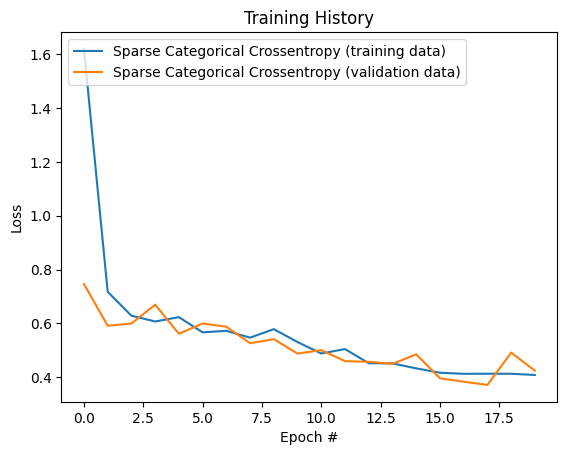

In [11]:
# Plot history
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

In [12]:
# Let's get the prediction for the candidate in the test set
model.predict(X_test[:1])

1/1 [==============================] - 0s 161ms/step


array([[3.8024366e-01, 6.1957955e-01, 1.7675527e-04]], dtype=float32)

In [13]:
predictions = model.predict(X_test)
aciertos = 0
errores = 0

for idx, prediction in enumerate(predictions):
    print('We predict: '+str(np.argmax(prediction))+'. the Real state of the candidates was: '+str(y_test.iloc[idx]))
    if np.argmax(prediction) == y_test.iloc[idx]:
        aciertos += 1
    else:
        errores += 1
print('successes: '+str(aciertos))
print('errors: '+str(errores))
print('accuracy: '+str(aciertos/(aciertos+errores)))

10/10 [==============================] - 0s 2ms/step
We predict: 1. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 1. the Real state of the candidates was: 1
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 0
We predict: 0. the Real state of the candidates was: 1
We predict: 0. the Real state of the candidates was: 0
We predict: 1. the Real state of the candidates was: 1
We predict: 1. the Real state of the candidates was: 1
We predict: 1. the Real state of the candidates was: 1
We predict: 0. the Real state of the candidates was: 0
We predict: 

10/10 [==============================] - 0s 4ms/step


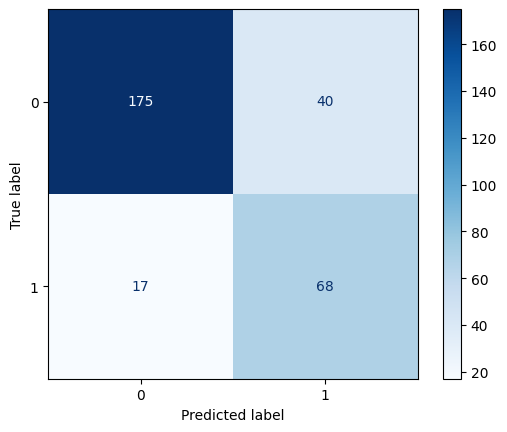

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()
